## Atividade 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dados_sat = pd.read_csv(r"C:\Users\luisasx\Downloads\notas.csv", engine='python', sep=';', decimal=",")
display(dados_sat)

,"SAT,GPA"
0,"1714,2.4"
1,"1664,2.52"
2,"1760,2.54"
3,"1685,2.74"
4,"1693,2.83"
...,...
79,"1936,3.71"
80,"1810,3.71"
81,"1987,3.73"
82,"1962,3.76"


In [23]:
import pandas as pd

# Ler o arquivo CSV, tratando o separador e o decimal
df = pd.read_csv(r"C:\Users\luisasx\Downloads\notas.csv", sep=',', decimal=".")

# Exibir as primeiras linhas para verificar se foi lido corretamente
print(df.head())

# Exibir os nomes das colunas para confirmar o nome da coluna SAT
print(df.columns)

    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83
Index(['SAT', 'GPA'], dtype='object')


In [25]:
# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar os nomes das colunas novamente
print(df.columns)

Index(['SAT', 'GPA'], dtype='object')


In [26]:
df['SAT'] = pd.to_numeric(df['SAT'], errors='coerce')

# Calcular a média e o desvio padrão da coluna SAT
media_sat = df['SAT'].mean()
desvio_padrao_sat = df['SAT'].std()

# Exibir os resultados
print(f"A média do SAT é: {round(media_sat, 2)}")
print(f"O desvio padrão do SAT é: {round(desvio_padrao_sat, 2)}")

A média do SAT é: 1845.27
O desvio padrão do SAT é: 104.53


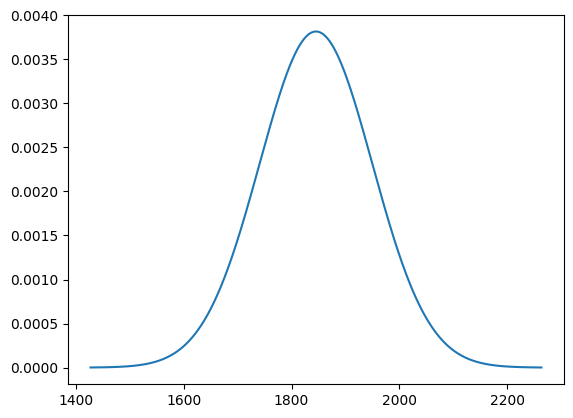

In [28]:
# fazer o histograma junto com a curva normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x= np.arange(media_sat-4*desvio_padrao_sat,media_sat+4*desvio_padrao_sat,0.001)
y = norm.pdf(x,media_sat,desvio_padrao_sat)
plt.plot(x, y)

plt.show()

In [29]:
# gerar uma tabela com o valor da moda, média e desvio padrão

media_sat = df['SAT'].mean()
desvio_padrao_sat = df['SAT'].std()
moda_sat = df['SAT'].mode()[0]  # mode() retorna uma série, pegamos o primeiro valor

tabela_estatisticas = pd.DataFrame({
    'Estatística': ['Média', 'Desvio Padrão', 'Moda'],
    'Valor': [round(media_sat, 2), round(desvio_padrao_sat, 2), moda_sat]
})

print(tabela_estatisticas)

     Estatística    Valor
0          Média  1845.27
1  Desvio Padrão   104.53
2           Moda  1850.00


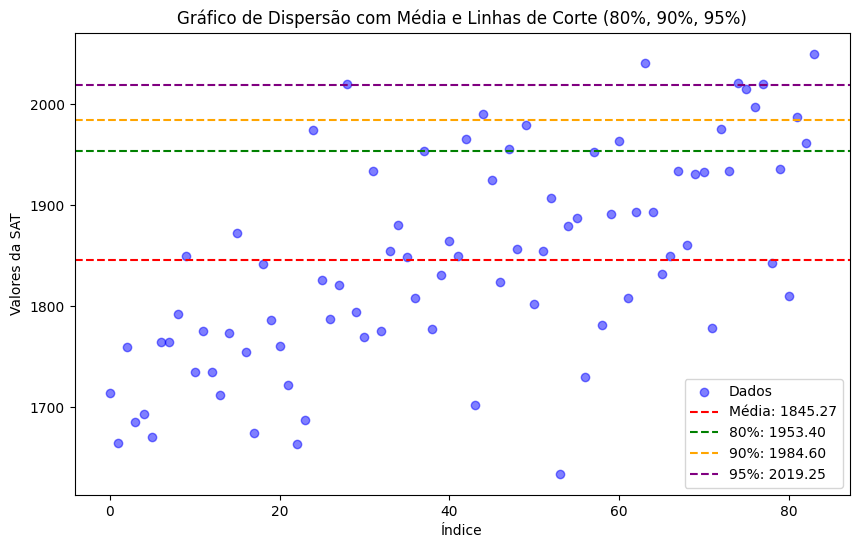

In [30]:
#fazer um gráfico com os pontos em dispersão, junto da média e linhas de corte a 80%, 90% e 95%

percentil_80 = np.percentile(df['SAT'], 80)
percentil_90 = np.percentile(df['SAT'], 90)
percentil_95 = np.percentile(df['SAT'], 95)

# Plotar gráfico de dispersão (gráfico de pontos)
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['SAT'], color='blue', label='Dados', alpha=0.5)

# Adicionar linha da média
plt.axhline(media_sat, color='red', linestyle='--', label=f'Média: {media_sat:.2f}')

# Adicionar linhas de corte para os percentis
plt.axhline(percentil_80, color='green', linestyle='--', label=f'80%: {percentil_80:.2f}')
plt.axhline(percentil_90, color='orange', linestyle='--', label=f'90%: {percentil_90:.2f}')
plt.axhline(percentil_95, color='purple', linestyle='--', label=f'95%: {percentil_95:.2f}')

# Adicionar título e rótulos
plt.title('Gráfico de Dispersão com Média e Linhas de Corte (80%, 90%, 95%)')
plt.xlabel('Índice')
plt.ylabel('Valores da SAT')
plt.legend()

# Exibir o gráfico
plt.show()

In [31]:
# fazer uma tabela de quantos pontos foram encontrados além desses intervalos e quantos pontos eram esperados
import pandas as pd
import numpy as np

# Exemplo de dados, substitua pela sua leitura de arquivo CSV
df = pd.read_csv(r"C:\Users\luisasx\Downloads\notas.csv", sep=',', decimal=".")

# Calcular os percentis
percentil_80 = np.percentile(df['SAT'], 80)
percentil_90 = np.percentile(df['SAT'], 90)
percentil_95 = np.percentile(df['SAT'], 95)

# Total de pontos
total_pontos = len(df)

# Contar os pontos além de cada percentil
acima_80 = len(df[df['SAT'] > percentil_80])
acima_90 = len(df[df['SAT'] > percentil_90])
acima_95 = len(df[df['SAT'] > percentil_95])

# Calcular os pontos esperados com base nos percentis
esperados_80 = total_pontos * (1 - 0.80)  # 20% dos pontos devem estar acima de 80%
esperados_90 = total_pontos * (1 - 0.90)  # 10% dos pontos devem estar acima de 90%
esperados_95 = total_pontos * (1 - 0.95)  # 5% dos pontos devem estar acima de 95%

# Criar a tabela
tabela_resultados = pd.DataFrame({
    'Percentil': ['80%', '90%', '95%'],
    'Pontos Encontrados': [acima_80, acima_90, acima_95],
    'Pontos Esperados': [esperados_80, esperados_90, esperados_95]
})

# Exibir a tabela
print(tabela_resultados)


  Percentil  Pontos Encontrados  Pontos Esperados
0       80%                  17              16.8
1       90%                   9               8.4
2       95%                   5               4.2


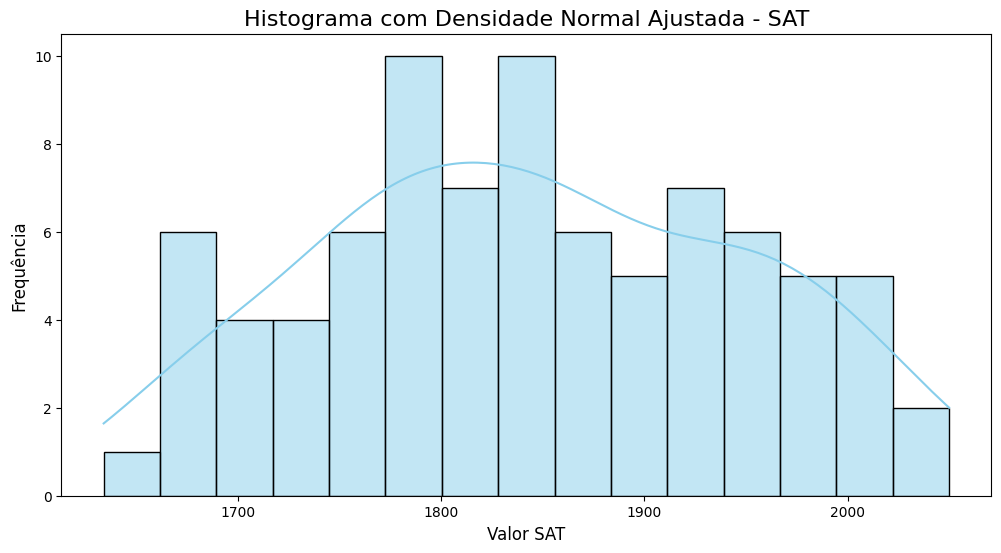

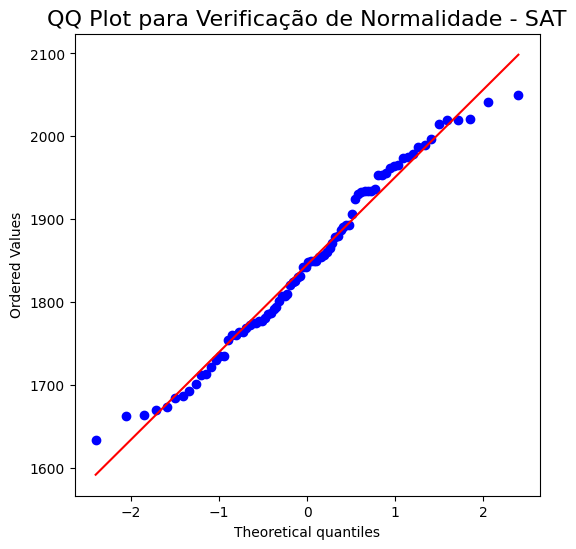

In [34]:
# a partir dos gráficos e tabelas, dizer se os pontos dessa coluna estão normalmente distribuídos

import seaborn as sns
import scipy.stats as stats

# 1. Histograma e Linha de Densidade Normal
plt.figure(figsize=(12, 6))

# Histograma com distribuição normal ajustada
sns.histplot(df['SAT'], kde=True, bins=15, color='skyblue', edgecolor='black')

# Título e rótulos
plt.title('Histograma com Densidade Normal Ajustada - SAT', fontsize=16)
plt.xlabel('Valor SAT', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

# 2. QQ Plot (Gráfico de Quantis-Quantis)
plt.figure(figsize=(6, 6))

# QQ plot
stats.probplot(df['SAT'], dist="norm", plot=plt)

# Título
plt.title('QQ Plot para Verificação de Normalidade - SAT', fontsize=16)
plt.show()

In [35]:
# Calcular a média e o desvio padrão da coluna 'GPA'
media_gpa = df['GPA'].mean()
desvio_padrao_gpa = df['GPA'].std()

# Exibir os resultados
print(f'Média da coluna GPA: {round(media_gpa, 2)}')
print(f'Desvio padrão da coluna GPA: {round(desvio_padrao_gpa, 2)}')

Média da coluna GPA: 3.33
Desvio padrão da coluna GPA: 0.27


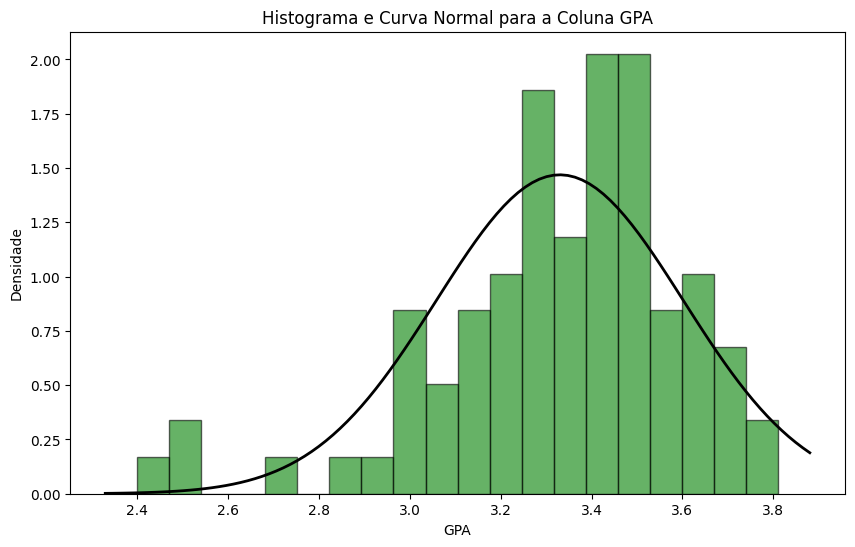

In [36]:

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['GPA'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')

# Gerar pontos para a curva normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Gerar a curva normal com base na média e no desvio padrão
p = stats.norm.pdf(x, media_gpa, desvio_padrao_gpa)

# Plotando a curva normal
plt.plot(x, p, 'k', linewidth=2)

# Adicionar título e rótulos
plt.title('Histograma e Curva Normal para a Coluna GPA')
plt.xlabel('GPA')
plt.ylabel('Densidade')

# Exibir o gráfico
plt.show()


In [37]:
# Calcular a moda, média e desvio padrão da coluna GPA
moda_gpa = df['GPA'].mode()[0]  # Moda retorna uma série, pegamos o primeiro valor
media_gpa = df['GPA'].mean()
desvio_padrao_gpa = df['GPA'].std()

# Criar uma tabela com esses valores
tabela_estatisticas = pd.DataFrame({
    'Estatística': ['Moda', 'Média', 'Desvio Padrão'],
    'Valor': [moda_gpa, media_gpa, desvio_padrao_gpa]
})

# Exibir a tabela
print(tabela_estatisticas)


     Estatística     Valor
0           Moda  3.280000
1          Média  3.330238
2  Desvio Padrão  0.271617


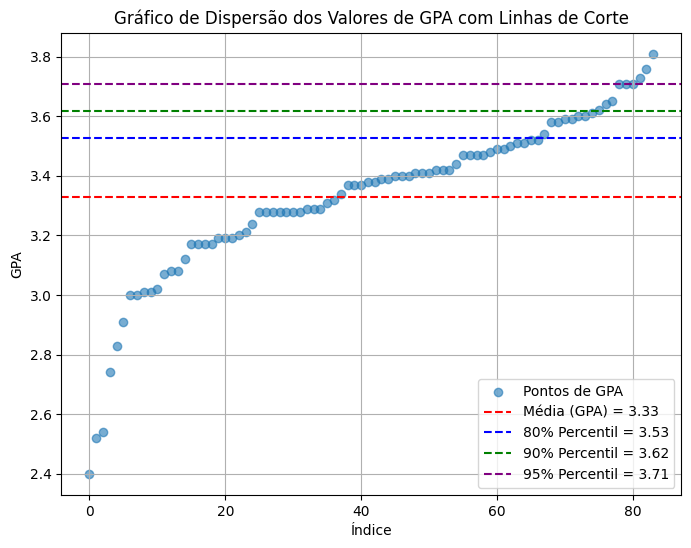

In [38]:
# fazer um gráfico com os pontos em dispersão, junto da média e linhas de corte a 80%, 90% e 95%

# Calcular as percentagens de 80%, 90% e 95%
percentil_80 = np.percentile(df['GPA'], 80)
percentil_90 = np.percentile(df['GPA'], 90)
percentil_95 = np.percentile(df['GPA'], 95)

# Criar o gráfico de dispersão (scatter plot)
plt.figure(figsize=(8, 6))

# Plotar os pontos de dispersão
plt.scatter(df.index, df['GPA'], label='Pontos de GPA', alpha=0.6)

# Adicionar linha da média
plt.axhline(media_gpa, color='red', linestyle='dashed', label=f'Média (GPA) = {media_gpa:.2f}')

# Adicionar linhas para os percentis
plt.axhline(percentil_80, color='blue', linestyle='dashed', label=f'80% Percentil = {percentil_80:.2f}')
plt.axhline(percentil_90, color='green', linestyle='dashed', label=f'90% Percentil = {percentil_90:.2f}')
plt.axhline(percentil_95, color='purple', linestyle='dashed', label=f'95% Percentil = {percentil_95:.2f}')

# Configurar o gráfico
plt.title('Gráfico de Dispersão dos Valores de GPA com Linhas de Corte')
plt.xlabel('Índice')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [39]:
# fazer uma tabela de quantos pontos foram encontrados além desses intervalos e quantos pontos eram esperados
# Calcular a média e desvio padrão da coluna GPA
media_gpa = df['GPA'].mean()
desvio_padrao_gpa = df['GPA'].std()

# Calcular os percentis de 80%, 90% e 95%
percentil_80 = np.percentile(df['GPA'], 80)
percentil_90 = np.percentile(df['GPA'], 90)
percentil_95 = np.percentile(df['GPA'], 95)

# Contar quantos pontos estão acima de cada percentil
pontos_acima_80 = len(df[df['GPA'] > percentil_80])
pontos_acima_90 = len(df[df['GPA'] > percentil_90])
pontos_acima_95 = len(df[df['GPA'] > percentil_95])

# Calcular quantos pontos seriam esperados dentro desses intervalos com base em uma distribuição normal
total_pontos = len(df)

# Para a distribuição normal, 80%, 90% e 95% são baseados nas probabilidades acumuladas
esperado_80 = total_pontos * 0.2  # 80% de probabilidade está abaixo, então 20% acima
esperado_90 = total_pontos * 0.1  # 90% abaixo, então 10% acima
esperado_95 = total_pontos * 0.05  # 95% abaixo, então 5% acima

# Criar a tabela com as informações
tabela_pontos = pd.DataFrame({
    'Percentil': ['80%', '90%', '95%'],
    'Pontos Acima': [pontos_acima_80, pontos_acima_90, pontos_acima_95],
    'Pontos Esperados': [esperado_80, esperado_90, esperado_95]
})

# Exibir a tabela
print(tabela_pontos)


  Percentil  Pontos Acima  Pontos Esperados
0       80%            17              16.8
1       90%             9               8.4
2       95%             3               4.2


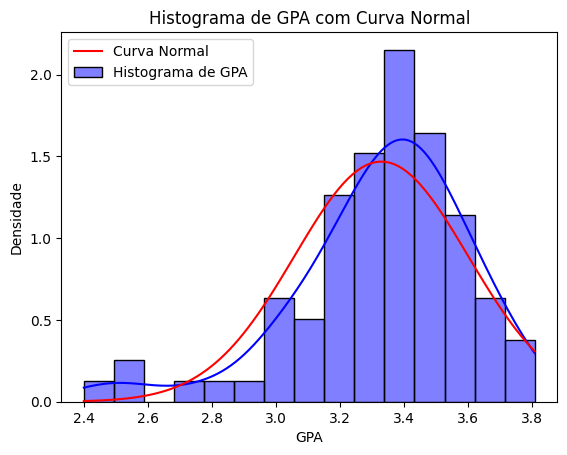

Teste de Shapiro-Wilk: Estatística = 0.9323893767812934, p-valor = 0.00026967321738861476
Os dados não seguem uma distribuição normal.
Média do GPA: 3.33
Mediana do GPA: 3.38
Desvio Padrão do GPA: 0.27


In [40]:
#a partir dos gráficos e tabelas, dizer se os pontos dessa coluna estão normalmente distribuídos

# Calcular média, mediana e desvio padrão
media_gpa = df['GPA'].mean()
mediana_gpa = df['GPA'].median()
desvio_padrao_gpa = df['GPA'].std()

# Plotar histograma com curva normal
sns.histplot(df['GPA'], kde=True, stat="density", bins=15, color="blue", label="Histograma de GPA")
x = np.linspace(min(df['GPA']), max(df['GPA']), 100)
pdf = stats.norm.pdf(x, media_gpa, desvio_padrao_gpa)
plt.plot(x, pdf, color='red', label="Curva Normal")
plt.title('Histograma de GPA com Curva Normal')
plt.xlabel('GPA')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Teste de Shapiro-Wilk para normalidade
stat, p_value = stats.shapiro(df['GPA'])
print(f"Teste de Shapiro-Wilk: Estatística = {stat}, p-valor = {p_value}")

# Se p-valor < 0.05, os dados não são normalmente distribuídos.
if p_value < 0.05:
    print("Os dados não seguem uma distribuição normal.")
else:
    print("Os dados seguem uma distribuição normal.")

# Exibir média, mediana e desvio padrão
print(f"Média do GPA: {media_gpa:.2f}")
print(f"Mediana do GPA: {mediana_gpa:.2f}")
print(f"Desvio Padrão do GPA: {desvio_padrao_gpa:.2f}")


### Relação entre SAT e GPA


Coeficiente de regressão (inclinação): 0.0017
Intercepto: 0.2750
R² (coeficiente de determinação): 0.4060
Erro Quadrático Médio (MSE): 0.0433


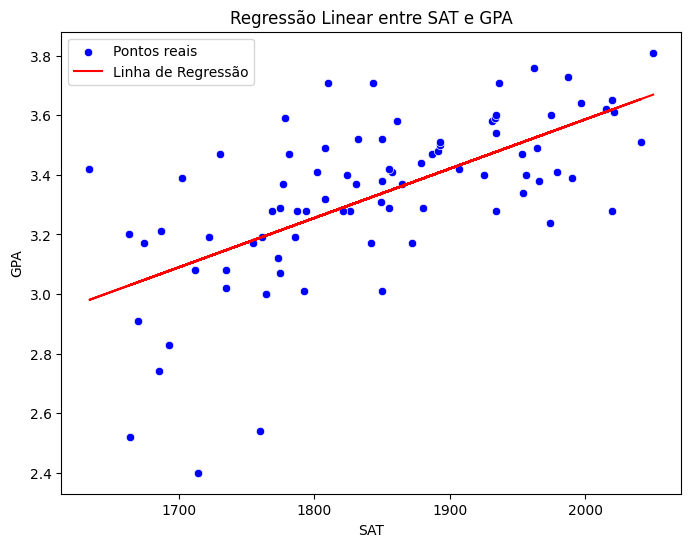

In [41]:
#fazer uma análise de regressão linear entre os pontos do SAT e GPA

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Definir as variáveis independentes (SAT) e dependente (GPA)
X = df[['SAT']]  # SAT como variável independente
y = df['GPA']   # GPA como variável dependente

# Inicializar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X, y)

# Coeficientes da regressão
coef = modelo.coef_[0]
intercepto = modelo.intercept_

# Previsões com o modelo ajustado
y_pred = modelo.predict(X)

# Calcular o R²
r2 = modelo.score(X, y)

# Calcular o erro quadrático médio (MSE) para avaliar o modelo
mse = mean_squared_error(y, y_pred)

# Exibir os resultados
print(f"Coeficiente de regressão (inclinação): {coef:.4f}")
print(f"Intercepto: {intercepto:.4f}")
print(f"R² (coeficiente de determinação): {r2:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")

# Plotar o gráfico de dispersão e a linha de regressão
plt.figure(figsize=(8,6))
sns.scatterplot(x='SAT', y='GPA', data=df, color='blue', label="Pontos reais")
plt.plot(df['SAT'], y_pred, color='red', label="Linha de Regressão")
plt.title('Regressão Linear entre SAT e GPA')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.legend()
plt.show()


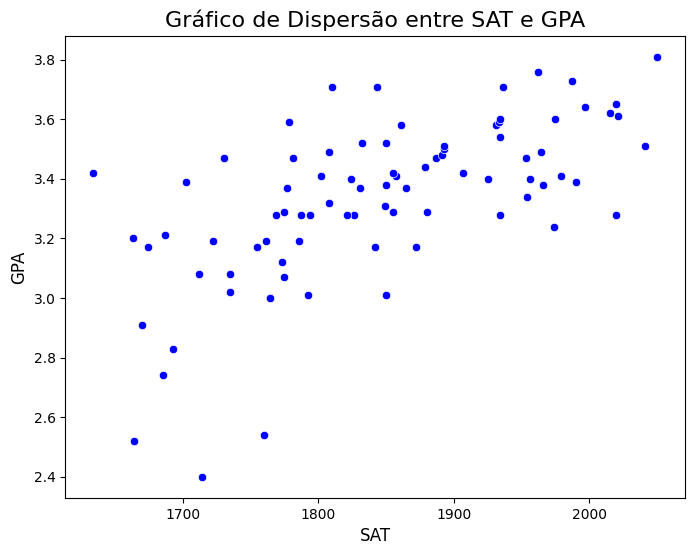

In [42]:
# fazer um gráfico de dispersão entre SAT e GPA

# Garantir que as colunas estejam no formato correto
df.columns = df.columns.str.strip()

# Criar o gráfico de dispersão
plt.figure(figsize=(8,6))  # Tamanho do gráfico
sns.scatterplot(x='SAT', y='GPA', data=df, color='blue')

# Títulos e rótulos
plt.title('Gráfico de Dispersão entre SAT e GPA', fontsize=16)
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

# Exibir o gráfico
plt.show()



In [43]:
# calcular os valores de R e R² (colocar esses dados em uma tabela)
# com base nos seus dados, dizer se os dados apresentam correlação fraca, média ou forte

# Calcular o coeficiente de correlação de Pearson (R)
r = df['SAT'].corr(df['GPA'])

# Calcular o coeficiente de determinação (R²)
r_squared = r**2

# Criar a tabela com R e R²
tabela_corr = pd.DataFrame({
    'Coeficiente de Correlação (R)': [r],
    'Coeficiente de Determinação (R²)': [r_squared]
})

# Exibir a tabela
print(tabela_corr)

# Analisar a força da correlação
if abs(r) >= 0.8:
    correlacao = "Forte"
elif abs(r) >= 0.5:
    correlacao = "Média"
else:
    correlacao = "Fraca"

print(f"A correlação entre SAT e GPA é considerada: {correlacao}")


   Coeficiente de Correlação (R)  Coeficiente de Determinação (R²)
0                       0.637184                          0.406004
A correlação entre SAT e GPA é considerada: Média
